# Quick comparative analysis - Steph vs Lebron

In [1]:
# As usual, we begin by importing the packages we will need

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# The data consists of the shot log for the NBA season 2016/17
shot.describe()

['self_previous_shot', 'player_position', 'home_game', 'location_x', 'opponent_previous_shot', 'home_team', 'shot_type', 'points', 'away_team', 'location_y', 'time', 'date', 'shoot_player', 'time_from_last_shot', 'quarter', 'current_shot_outcome']


,location_x,points,location_y,time_from_last_shot,quarter
count,209675.000000,210072.000000,209675.00000,200072.000000,210072.000000
mean,468.524507,2.316130,249.44723,33.279489,2.480383
std,345.063654,0.464965,111.02320,19.797357,1.136841
min,0.000000,2.000000,0.00000,0.000000,1.000000
25%,94.000000,2.000000,197.00000,22.000000,1.000000
50%,342.000000,2.000000,250.00000,31.000000,2.000000
75%,843.000000,3.000000,303.00000,41.000000,3.000000
max,933.000000,3.000000,500.00000,255.000000,8.000000


In [6]:
shot['halfcourt_x'] =np.where(shot['location_x'] < 933/2, 933 - shot['location_x'],shot['location_x'])
shot['halfcourt_y'] =np.where(shot['location_x'] < 933/2, 500 - shot['location_y'],shot['location_y'])
shot.describe()

,location_x,points,location_y,time_from_last_shot,quarter,halfcourt_x,halfcourt_y
count,209675.000000,210072.000000,209675.00000,200072.000000,210072.000000,209675.000000,209675.000000
mean,468.524507,2.316130,249.44723,33.279489,2.480383,799.731480,250.303947
std,345.063654,0.464965,111.02320,19.797357,1.136841,89.606222,111.024160
min,0.000000,2.000000,0.00000,0.000000,1.000000,468.000000,0.000000
25%,94.000000,2.000000,197.00000,22.000000,1.000000,720.000000,197.000000
50%,342.000000,2.000000,250.00000,31.000000,2.000000,841.000000,250.000000
75%,843.000000,3.000000,303.00000,41.000000,3.000000,878.000000,303.000000
max,933.000000,3.000000,500.00000,255.000000,8.000000,933.000000,500.000000


In [7]:
# Comparing players

# We use a pivot table here to list players by shots

playersn = shot.groupby('shoot_player')['current_shot_outcome'].describe().reset_index()
playersn.sort_values(by = 'count', ascending = False)

,shoot_player,count,unique,top,freq
402,Russell Westbrook,1940,3,MISSED,1026
25,Andrew Wiggins,1568,3,MISSED,760
106,DeMar DeRozan,1545,3,MISSED,731
193,James Harden,1532,3,MISSED,772
28,Anthony Davis,1525,3,SCORED,770
...,...,...,...,...,...
111,Demetrius Jackson,4,2,SCORED,3
203,Jarrett Jack,3,2,SCORED,2
38,Ben Bentil,3,1,MISSED,3
202,Jarnell Stokes,1,1,SCORED,1


We now compare LeBron James with Steph Curry. 

In [8]:
# LeBron subset

LeBron = shot[shot['shoot_player']=='LeBron James']
LeBron

,self_previous_shot,player_position,home_game,location_x,opponent_previous_shot,home_team,shot_type,points,away_team,location_y,time,date,shoot_player,time_from_last_shot,quarter,current_shot_outcome,halfcourt_x,halfcourt_y
35023,MISSED,SF,Yes,131.0,SCORED,CLE,Jump Shot,2,NYK,171.0,1:01,10/25/2016,LeBron James,27.0,1,SCORED,802.0,329.0
35028,MISSED,SF,Yes,236.0,MISSED,CLE,Jump Shot,3,NYK,84.0,2:33,10/25/2016,LeBron James,6.0,1,MISSED,697.0,416.0
35030,BLOCKED,SF,Yes,264.0,SCORED,CLE,Jump Shot,3,NYK,383.0,3:44,10/25/2016,LeBron James,42.0,1,MISSED,669.0,117.0
35037,SCORED,SF,Yes,50.0,MISSED,CLE,Running Layup,2,NYK,259.0,6:04,10/25/2016,LeBron James,17.0,1,SCORED,883.0,241.0
35044,MISSED,SF,Yes,52.0,SCORED,CLE,Putback Dunk,2,NYK,250.0,8:23,10/25/2016,LeBron James,4.0,1,SCORED,881.0,250.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41795,MISSED,SF,No,51.0,SCORED,ATL,Driving Layup,2,CLE,246.0,1:16,4/9/2017,LeBron James,47.0,4,MISSED,882.0,254.0
41798,SCORED,SF,No,58.0,SCORED,ATL,Driving Layup,2,CLE,249.0,3:36,4/9/2017,LeBron James,58.0,4,SCORED,875.0,251.0
41801,SCORED,SF,No,52.0,MISSED,ATL,Driving Dunk,2,CLE,250.0,5:54,4/9/2017,LeBron James,29.0,4,SCORED,881.0,250.0
41806,SCORED,SF,No,77.0,SCORED,ATL,Fadeaway Jumper,2,CLE,450.0,8:54,4/9/2017,LeBron James,31.0,4,MISSED,856.0,50.0


Text(0.5, 1.0, 'LeBron James')

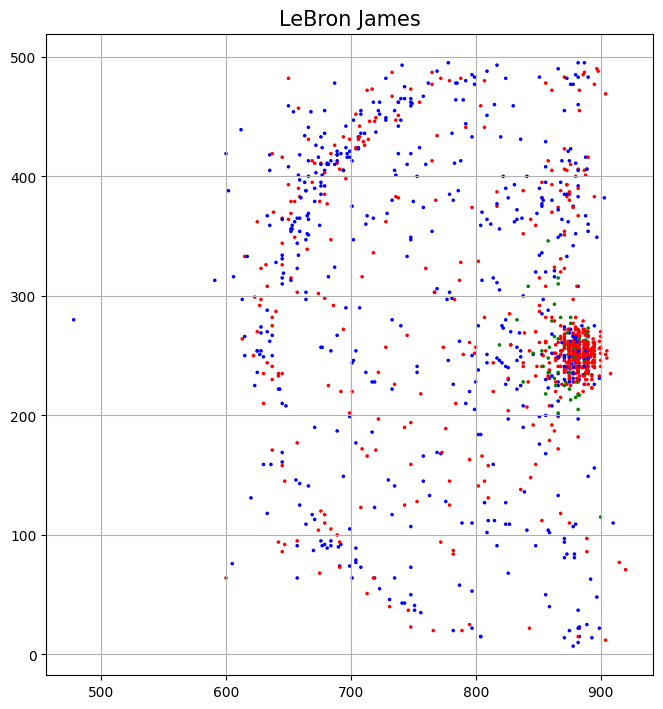

In [9]:
# LeBron plot
# Note how the shots can be color coded using an np.where statement. 

hxL = LeBron['halfcourt_x']
hyL = LeBron['halfcourt_y']
colors = np.where(LeBron['current_shot_outcome']=='SCORED','r',np.where(LeBron['current_shot_outcome']=='MISSED','b','g'))
plt.figure(figsize=(94/12,50/6))
plt.scatter(hxL,hyL, s=10, c= colors, marker= '.')
plt.grid(True)
plt.title("LeBron James", fontsize = 15)

Text(0.5, 1.0, 'Steph Curry')

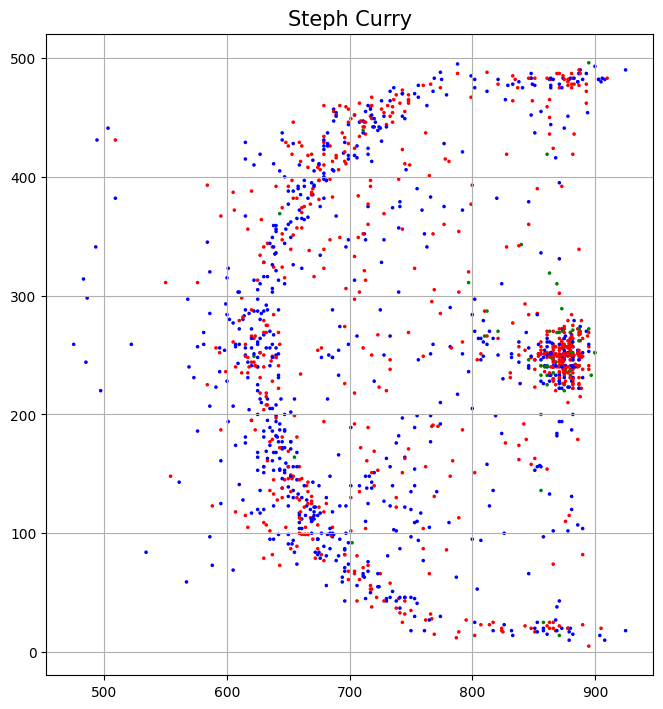

In [10]:
# Steph Curry plot

Curry = shot[shot['shoot_player']=='Stephen Curry']
hxC = Curry['halfcourt_x']
hyC = Curry['halfcourt_y']
colors = np.where(Curry['current_shot_outcome']=='SCORED','r',np.where(Curry['current_shot_outcome']=='MISSED','b','g'))
plt.figure(figsize=(94/12,50/6))
plt.scatter(hxC,hyC, s=10, c= colors, marker= '.')
plt.grid(True)
plt.title("Steph Curry", fontsize = 15)

Text(0.5, 1.0, 'Steph Curry')

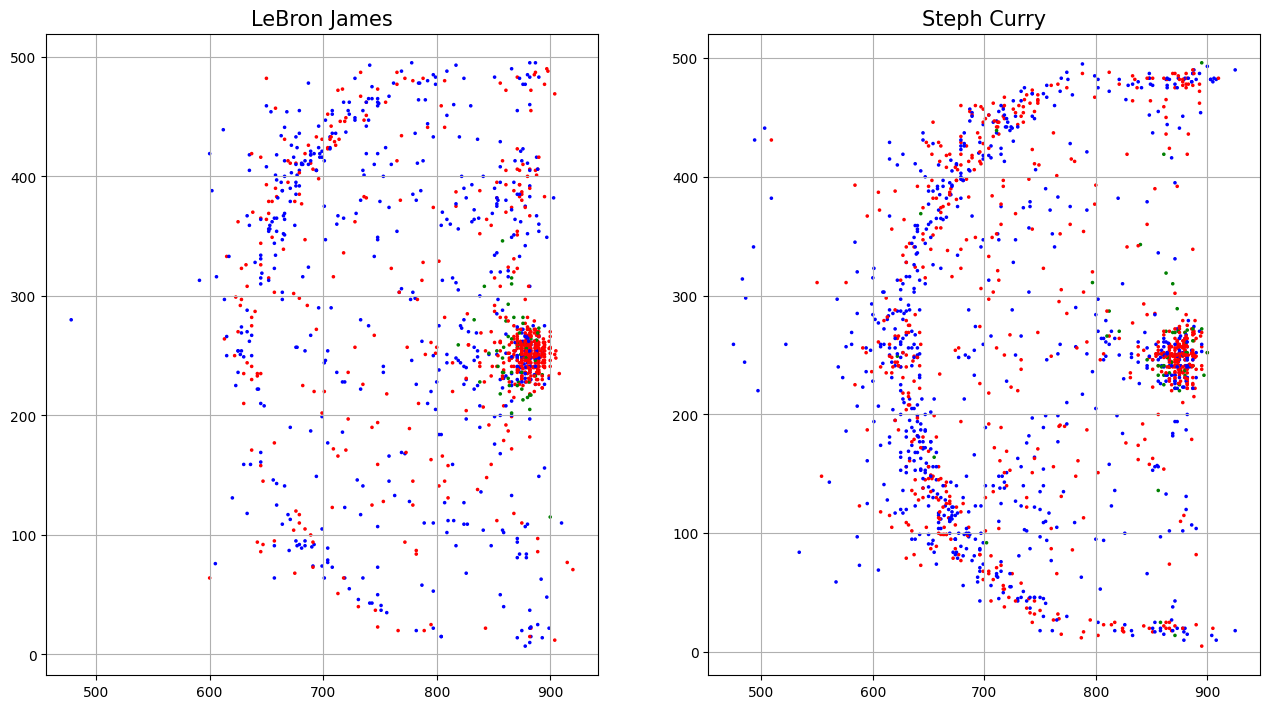

In [11]:
# LeBron James and Steph Curry side by side

f = plt.figure(figsize=(94/6,50/6))
ax = f.add_subplot(121)
colors = np.where(LeBron['current_shot_outcome']=='SCORED','r',np.where(LeBron['current_shot_outcome']=='MISSED','b','g'))
ax = plt.scatter(hxL,hyL, s=10, c= colors, marker= '.')
plt.grid(True)
plt.title("LeBron James", fontsize = 15)
ax = f.add_subplot(122)
colors = np.where(Curry['current_shot_outcome']=='SCORED','r',np.where(Curry['current_shot_outcome']=='MISSED','b','g'))
ax = plt.scatter(hxC,hyC, s=10, c= colors, marker= '.')
plt.grid(True)
plt.title("Steph Curry", fontsize = 15)

These simple plots make clear some of the differences between the two players. It is clearly visible that Curry shoots more from the three-point line than LeBron, while LeBron is more active on the paint. Some more subtle differences are also visible. LeBron is more active on the left hand side of the court, while Curry is equally active on both sides. Curry also shoots more three-pointers from the corners.

References:
-  Foundations of Sports Analytics: Data, Representation, and Models in Sports https://www.coursera.org/learn/foundations-sports-analytics